#### German Credit Dataset

In [2]:
import re
import numpy as np
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt
from collections import Counter
import random
import math

In [3]:
#create dataset
df = pd.read_csv('GermanCredit.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


#### Preprocessing

**1. Drop the 3 columns that contribute the least to the dataset. These would be the columns with
the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code
should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for
n=3.)**

In [4]:
# create a dictionary that counts 'none' values
mydict = {}
for ele in df.columns:
    mydict[ele] = df.loc[df[ele] == 'none', ele].count()
# set number of columns to drop
n = 3
# use counter and most_common
k = Counter(mydict).most_common(n)
# drop columns
for col, num in k:
    df.drop(col,axis=1,inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


**2. Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.**

In [5]:
df.replace('\'', '', regex=True, inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


**3. The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.**

In [6]:
df['checking_status'].replace('no checking', 'No Checking', inplace=True)
df['checking_status'].replace('<0', 'Low', inplace=True)
df['checking_status'].replace('0<=X<200', 'Medium', inplace=True)
df['checking_status'].replace('>=200', 'High', inplace=True)

In [7]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


**4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').**

In [8]:
df['savings_status'].replace('no known savings', 'No Savings', inplace=True)
df['savings_status'].replace('<100', 'Low', inplace=True)
df['savings_status'].replace('100<=X<500', 'Medium', inplace=True)
df['savings_status'].replace('500<=X<1000', 'High', inplace=True)
df['savings_status'].replace('>=1000', 'High', inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


**5. Change class column values from 'good' to '1' and 'bad' to '0'.**

In [9]:
df['class'].replace('good',1, inplace=True)
df['class'].replace('bad',0, inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


**6. Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.**

In [10]:
# grab all possible values in column
val = df['employment'].unique()
val

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [11]:
# replace values
df['employment'].replace('unemployed','Unemployed',inplace=True)
df['employment'].replace('<1','Amateur',inplace=True)
df['employment'].replace('1<=X<4','Professional',inplace=True)
df['employment'].replace('4<=X<7','Experienced',inplace=True)
df['employment'].replace('>=7','Expert',inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


#### Analysis

**Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.**

**1a. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).**

In [12]:
# foreign workers
pd.crosstab(df['foreign_worker'],df['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


**1b. Similarly, get the count of each category of employment for each category of saving_status.**

In [13]:
c = pd.crosstab(df['employment'], df['savings_status'])
c

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


**2. Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.**

In [14]:
dfsm = df.loc[(df['personal_status'] == 'male single') & (df['employment'] == 'Experienced')] #grab single males (the DATA you fool!)
print("The average credit amount is: $" + str(dfsm['credit_amount'].mean())) #simply find mean of the new dataframe

The average credit amount is: $4142.592592592592


**3. Find the average credit duration for each of the job types. You can leave the raw result as is,
no need for rounding.**

In [15]:
#create dataframe for each job type
dfhq = df.loc[df['job'] == 'high qualif/self emp/mgmt']
dfsk = df.loc[df['job'] == 'skilled']
dfunemp = df.loc[df['job'] == 'unemp/unskilled non res']
dfunsk = df.loc[df['job'] == 'unskilled resident']
#simply find mean duration for each job type using pandas function
print("The average credit duration is: " + str(dfhq['duration'].mean())) 
print("The average credit duration is: " + str(dfsk['duration'].mean()))
print("The average credit duration is: " + str(dfunemp['duration'].mean()))
print("The average credit duration is: " + str(dfunsk['duration'].mean()))

The average credit duration is: 25.16891891891892
The average credit duration is: 21.41111111111111
The average credit duration is: 17.363636363636363
The average credit duration is: 16.535


**4. For the purpose 'education', what is the most common checking_status and savings_status?**

In [16]:
def most_common_helper(string): #helper method
    #since the pandas function .mode() finds the most common value but also contains other data in it, we use this helper method to return the simple string value of the column
    if 'Low' in string:
        return 'Low'
    if 'Medium' in string:
        return 'Medium'
    if 'High' in string:
        return 'High'
    if 'No Checking' in string:
        return 'No Checking'
    else:
        return 'No Savings'

dfe = df.loc[df['purpose'] == 'education']
mc_checking = str(dfe.checking_status.mode())
mc_saving = str(dfe.savings_status.mode())
print('Most common checking status: ' + most_common_helper(mc_checking))
print('Most common savings status: ' + most_common_helper(mc_saving))

Most common checking status: No Checking
Most common savings status: Low


**Visualization**

**1. Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.**

Text(0, 0.5, 'Number of People')

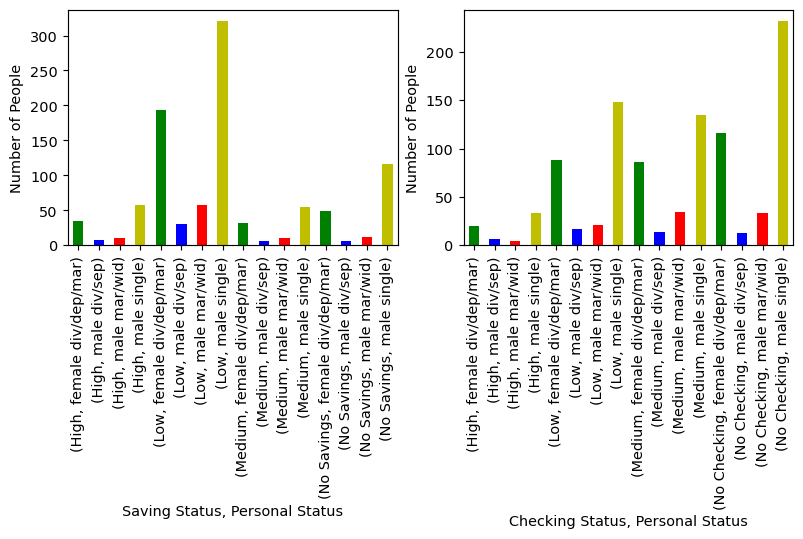

In [17]:
fig = plt.figure(figsize=(9,3),dpi=104) #create figure
ax1 = fig.add_subplot(121) #create subplot
dfps = df[['savings_status', 'personal_status']].copy() #grab two columns for us to use
my_colors = ['g', 'b', 'r', 'y']*4 #since we want the colors to be consistent with each personal status, we make a list of four repeating colors
dfps.groupby(['savings_status','personal_status']).size().plot(kind='bar', color = my_colors)
#labeling
plt.xlabel("Saving Status, Personal Status")
plt.ylabel("Number of People")
#same process as above for checking status
ax2 = fig.add_subplot(122)
dfpc = df[['checking_status', 'personal_status']].copy()
my_colors = ['g', 'b', 'r', 'y']*4
dfpc.groupby(['checking_status','personal_status']).size().plot(kind='bar', color = my_colors)
plt.xlabel("Checking Status, Personal Status")
plt.ylabel("Number of People")

**2. For people having credit_amount more than 4000, plot a bar graph which maps
property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).**


Text(0, 0.5, 'average age')

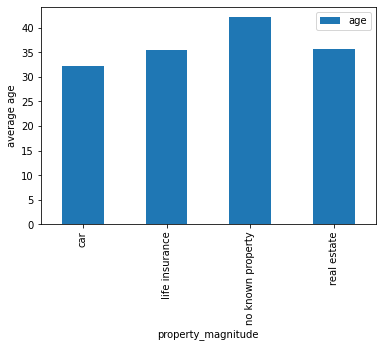

In [18]:
dfc = df.loc[df['credit_amount'] > 4000] #grab people with >4000 credit amount
dfc = dfc.groupby(['property_magnitude']).agg({'age':'mean'}) #find average age for each property magnitude
dfc.plot.bar()
#labeling
plt.xlabel("property_magnitude")
plt.ylabel("average age")

**3. For people with a "High" savings_status and age above 40, use subplots to plot the following
pie charts:**

**a. Personal status**

**b. Credit history**

**c. Job**

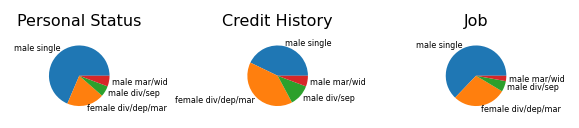

In [81]:
def labelHelper(category, dataframe): #helper method that sorts unqiue category groups by frequency and returns a list of sorted group names
    dfk = dataframe.groupby([category])['age'].count().reset_index(
    name='Count').sort_values(['Count'], ascending=False)
    return dfk[category].tolist() #this way, you can use this code for any category even outside the three in the problem

dfh = df.loc[(df['savings_status'] == 'High') & (df['age'] > 40)] #grab the sample we want

fig = plt.figure(figsize=(4,3),dpi=144) #create figure
#first plot
ax1 = fig.add_subplot(131)
cts = dfh.personal_status.value_counts().to_frame() #count the unique personal statuses
ax1.pie(cts.personal_status, labels=labelHelper('personal_status', dfh), textprops={'fontsize': 4})
ax1.set_title('Personal Status', fontsize=8)
#second plot
ax2 = fig.add_subplot(132)
cts = dfh.credit_history.value_counts().to_frame()
ax2.pie(cts.credit_history, labels=labelHelper('personal_status', dfh), textprops={'fontsize': 4})
ax2.set_title('Credit History', fontsize=8)
#third plot
ax3 = fig.add_subplot(133)
cts = dfh.job.value_counts().to_frame()
ax3.pie(cts.job, labels=labelHelper('personal_status', dfh), textprops={'fontsize': 4})
ax3.set_title('Job', fontsize=8)
fig.tight_layout()
plt.show()